# Electric Vehicle Segmentation
* Github Link: https://github.com/mdismailquraishicse/ElectricVehicleSegmentation
* Project Type: Un-Supervised ML/ Clustering
* By : Md Ismail Quraishi

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import eda
import prepro
import model_building

In [2]:
# Load the data
path = 'data/car data.csv'
df = eda.getDf(path)

First five rows :
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

shape of the data : (301, 9)
duplicate rows : 2

columns : 
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

null values in each column :
               null_count  null_%
index                            
Car_Name                0     0.0
Year              

**About the dataset**
1. The dataset has 301 rows and 9 columns with 2 duplicate rows and 0 nan values.
2. Selling Price has mean 4.66, median 3.6 and max 35. Since the difference between mean, median and max is huge therefore we can say there are some outliers.
3. Present Price has mean 7.62, median 6.40 and max 92. Since the difference between mean, median and max is huge therefore we can say there are some outliers.
4. Since this  is a clustering project therefore we would not go for outlier treatment.

## EDA

In [8]:
eda.EDA(df)

Duplicate rows successfully dropped
Top 5 car names by highest selling price
Car_Name
land cruiser    35.000000
fortuner        18.254000
innova          12.777778
creta           11.800000
elantra         11.600000
Name: Selling_Price, dtype: float64

Top 5 car names by highest present price
Car_Name
land cruiser     92.600000
fortuner         30.745000
camry            23.730000
innova           17.846667
corolla altis    17.582500
Name: Present_Price, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
Mean Median Max of Fuel Type = Petrol
                       mean    median        max
Year            2013.539749   2014.00    2017.00
Selling_Price      3.264184      2.65      19.75
Present_Price      5.583556      4.60      23.73
Kms_Driven     33528.937238  25870.00  500000.00
pred_label         2.594142      2.00       7.00

Mean Median Max of Fuel Type = Diesel
    

## Preprocessing

In [4]:
x, vector_df, count = prepro.preBuild(df)

total features :  50
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- END OF PREPROCESSING -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

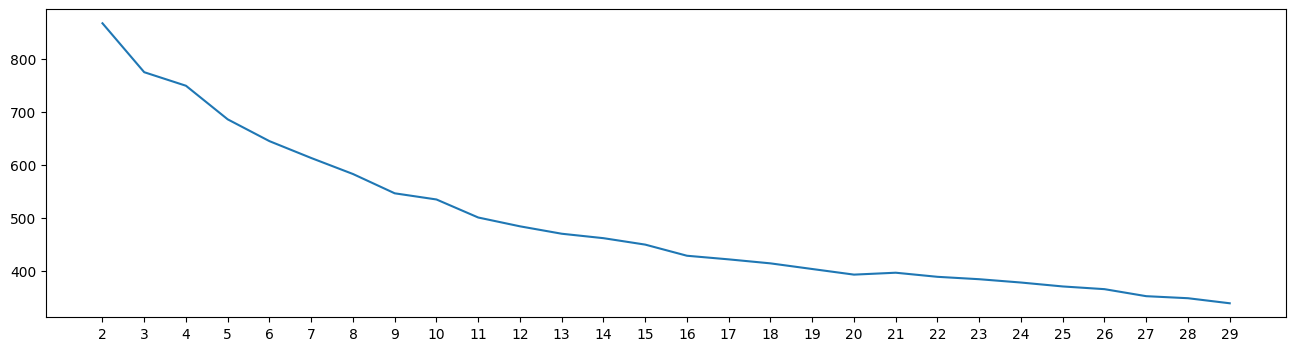

In [5]:
# Make K models and compare them
inertia = []
n = 30
for k in range(2,n, 1):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(vector_df.values)
    inertia.append(kmeans.inertia_)
# Compare model performance based on inertia visualization
plt.figure(figsize=(16,4))
plt.plot(np.arange(2,n,1),inertia)
plt.xticks(np.arange(2,n,1))
plt.show()

In [6]:
model_building.getModel(df)

total features :  50
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- END OF PREPROCESSING -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

In [7]:
df['pred_label']= model_building.makePred(df['text'])
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,SellingPriceRange,KmsDrivenRange,text,pred_label
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,midsp,midkms,ritz 2014 midsp midkms petrol manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,midsp,midkms,sx4 2013 midsp midkms diesel manual,0


***Conclusions :***
1. Land Cruiser is most expensive car.
2. Average selling price of petrol, diesel and cng cars are is 3.26, 10.10 and 3.10 respectively.
3. Total 239 care are of type petrol. Only 58 cars are diesel type and 2 cng type.
4. Total 260 cars are manual and only 39 cars are automatic.
5. Highest selling price of cars are on year 2018 while Kms_driven is on 2004.
6. Mean selling price and Kms_Driven of diesel car is highest that is 10.10 and 50675 respectively. While in case of cng mean price is least 3.20 and Kms_Driven is very high that is 42749.
7. Although selling and present price of cars run by diesels are highest but Kms_driven are  high too. As we all know Diesel is cheaper than petrol that's why people prefer to buy diesel car rather than petrol car.
8. CNG is cheaper than diesel and it is also new technology with respect to diesel that's why Kms_driven of cng is  also higher than petrol but lesser than diesel but the gap between them are very less.
9. However Electric Vehicle is completely new in market and electric vehicles are also pollution free at least while on road. We are not going to disscuss how electric produced in factory whether it produces pollutions or not.
10. As we know electric vehicles and electric both are cheaper than petrol and diesel and government also promoting this technology giving subsidies etc.
**To capture vehicle market in India we must go with Electric Vehicle specially in cities like Delhi, Mumbai, Kolkata etc. Because these cities are facing big challenges of air pollutiions**